In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
amazon_titles = pd.read_csv("F:/Programing/jupyter/titles/amazon_titles.csv")
appletv_titles = pd.read_csv("F:/Programing/jupyter/titles/apple_titles.csv")
disney_titles = pd.read_csv("F:/Programing/jupyter/titles/disney_titles.csv")
hbo_titles = pd.read_csv("F:/Programing/jupyter/titles/hbo_titles.csv")
netflix_titles = pd.read_csv("F:/Programing/jupyter/titles/netflix_titles.csv")
paramount_titles = pd.read_csv("F:/Programing/jupyter/titles/paramount_titles.csv")

In [3]:
titles = pd.concat([amazon_titles, appletv_titles, disney_titles, hbo_titles, netflix_titles, paramount_titles], axis = 0).reset_index()
titles.drop(['index'], axis=1, inplace=True)

In [4]:
titles[titles.duplicated() == True].head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
11321,tm57241,Never Been Kissed,MOVIE,"Josie Geller, a baby-faced junior copywriter a...",1999,PG-13,107,"['comedy', 'drama', 'romance']",['US'],NaN,tt0151738,6.0,93238.0,17.420,6.180
11387,ts22130,Rolie Polie Olie,SHOW,Rolie Polie Olie was a children's television s...,1998,TV-Y,21,"['animation', 'comedy', 'family', 'fantasy', '...","['CA', 'FR', 'US', 'GB']",6.0,tt0172049,6.3,3012.0,13.848,6.600
11586,tm98015,The Last Song,MOVIE,A drama centered on a rebellious girl who is s...,2010,PG,107,"['drama', 'romance', 'music']",['US'],NaN,tt1294226,6.0,89378.0,15.081,7.242
11613,ts22233,Shake It Up,SHOW,Best pals CeCe and Rocky dream of dancing star...,2010,TV-G,25,"['comedy', 'family']",['US'],3.0,tt0453993,8.0,88.0,41.672,7.800
11822,ts7273,Doc McStuffins,SHOW,A young African-American girl aspires to be a ...,2012,TV-G,22,"['animation', 'family', 'fantasy', 'music']",['US'],6.0,tt1710295,6.6,2551.0,35.228,5.800


In [5]:
titles.drop_duplicates(inplace=True)

In [6]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [7]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23362 entries, 0 to 25245
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23362 non-null  object 
 1   title                 23362 non-null  object 
 2   type                  23362 non-null  object 
 3   description           23167 non-null  object 
 4   release_year          23362 non-null  int64  
 5   age_certification     11381 non-null  object 
 6   runtime               23362 non-null  int64  
 7   genres                23362 non-null  object 
 8   production_countries  23362 non-null  object 
 9   seasons               5623 non-null   float64
 10  imdb_id               21412 non-null  object 
 11  imdb_score            20804 non-null  float64
 12  imdb_votes            20744 non-null  float64
 13  tmdb_popularity       22642 non-null  float64
 14  tmdb_score            20362 non-null  float64
dtypes: float64(5), int6

In [8]:
titles.isna().sum()

id                          0
title                       0
type                        0
description               195
release_year                0
age_certification       11981
runtime                     0
genres                      0
production_countries        0
seasons                 17739
imdb_id                  1950
imdb_score               2558
imdb_votes               2618
tmdb_popularity           720
tmdb_score               3000
dtype: int64

Text(0.5, 1.0, 'Distribution of Missing Values')

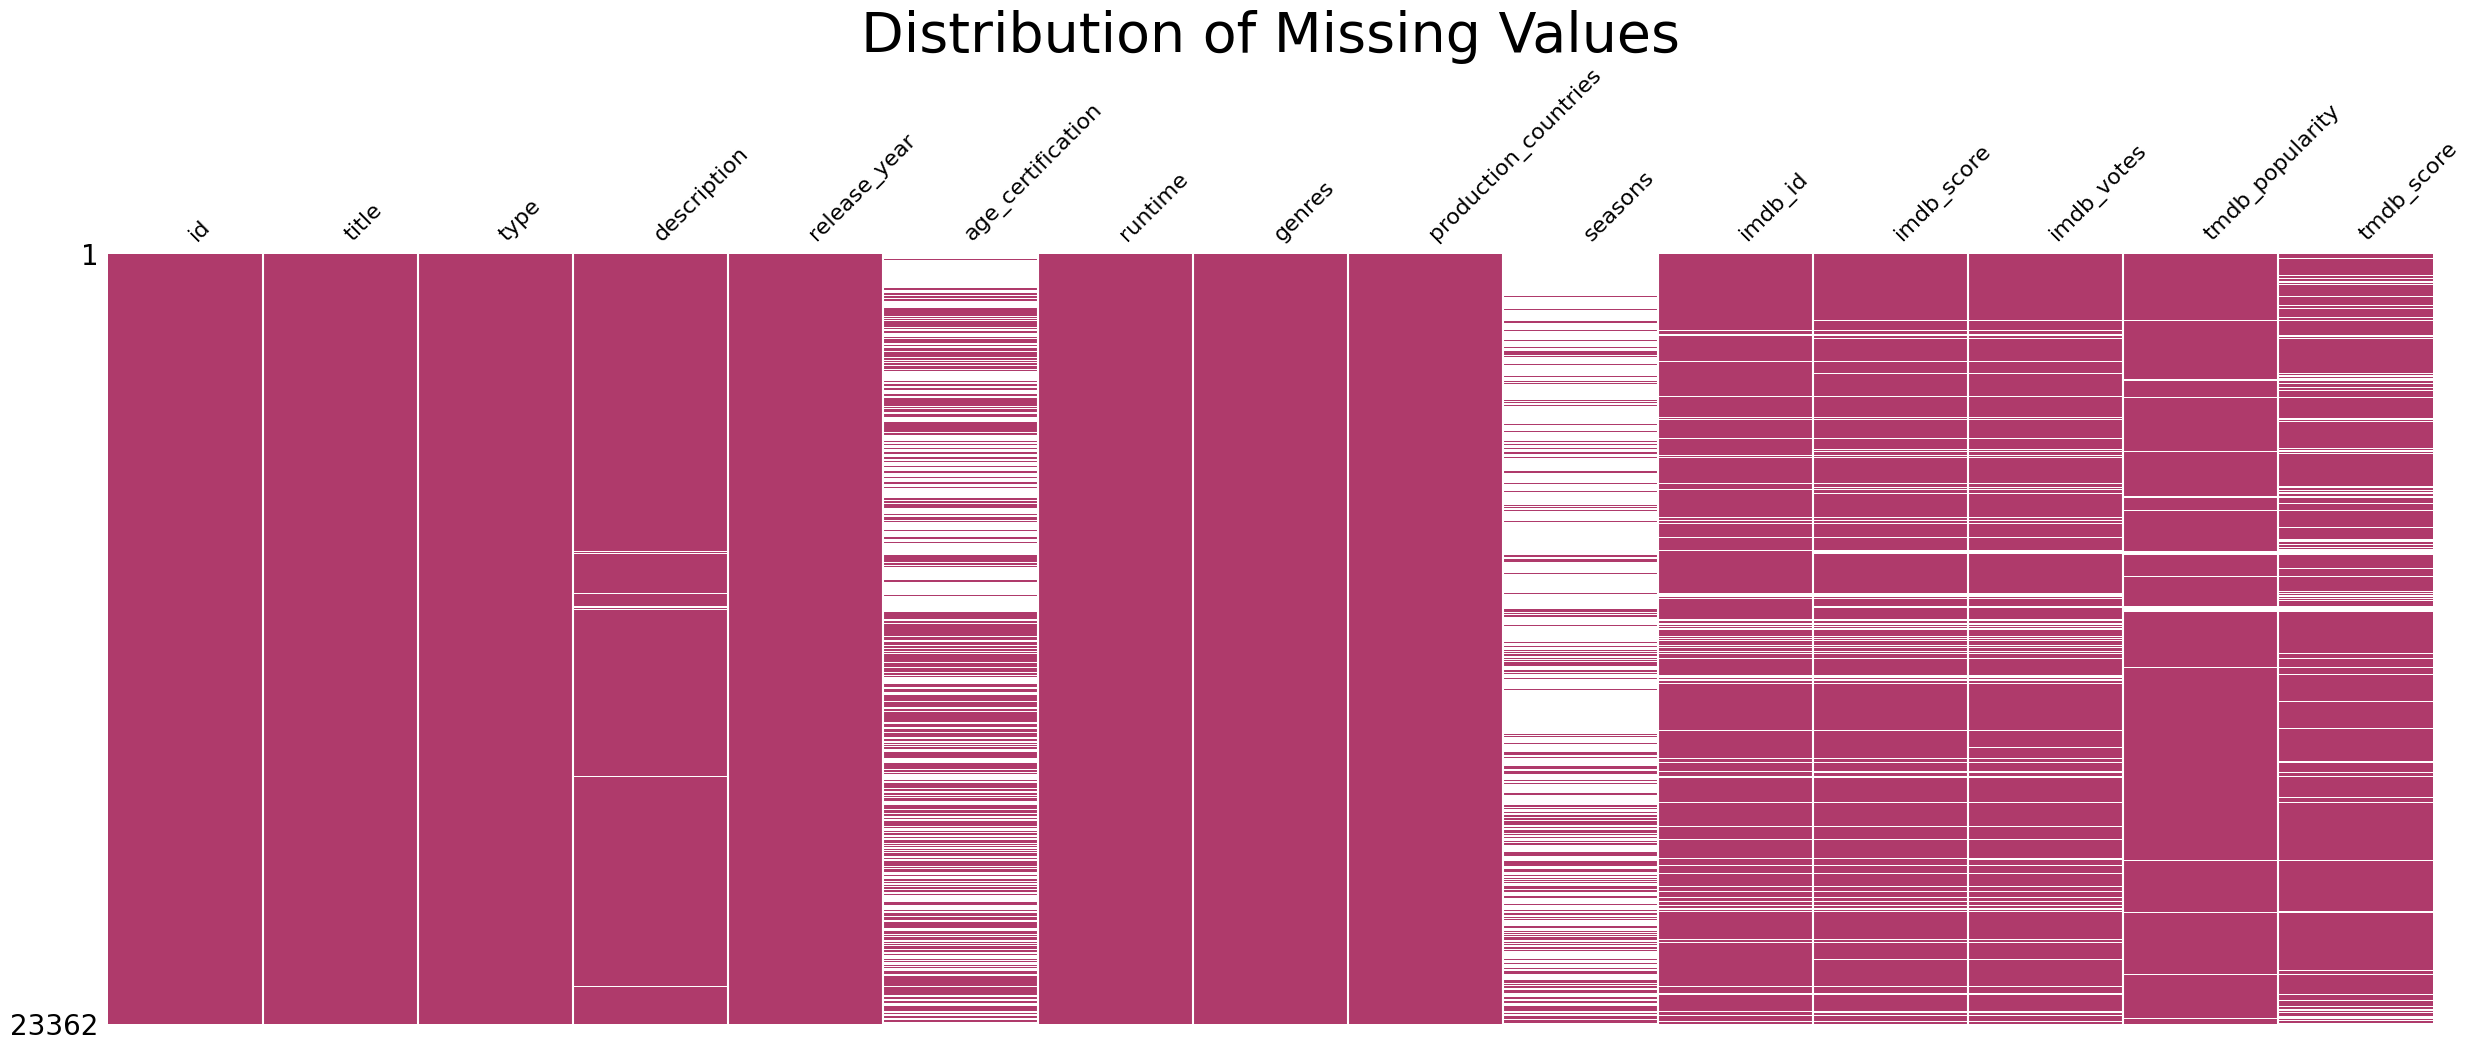

In [9]:
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

In [10]:
titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
titles['genre'] = titles['genres'].str.split(',').str[0]

titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
titles['production_country'] = titles['production_countries'].str.split(',').str[0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_3220\538001835.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3220\538001835.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')


In [11]:
titles.drop(['genres', 'production_countries'], axis=1, inplace=True)

In [12]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,NaN,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,NaN,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,NaN,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,NaN,tt0040724,7.8,32210.0,12.400,7.400,western,US


In [13]:
titles['genre'].unique()

array(['drama', 'comedy', 'western', 'romance', 'action', 'fantasy',
       'horror', 'thriller', 'documentation', 'music', 'crime', '', 'war',
       'reality', 'scifi', 'history', 'family', 'animation', 'sport',
       'european'], dtype=object)

In [14]:
titles['production_country'].unique()

array(['US', 'GB', 'SU', 'DE', 'MX', 'CA', 'IN', '', 'SE', 'IT', 'MA',
       'HK', 'FR', 'JP', 'PR', 'ES', 'IE', 'PH', 'CH', 'RO', 'YU', 'KR',
       'TW', 'MC', 'IL', 'EG', 'RU', 'AU', 'NZ', 'AT', 'ZA', 'LI', 'BR',
       'DK', 'IR', 'PT', 'BE', 'FI', 'AR', 'NL', 'ID', 'VE', 'XC', 'NO',
       'BG', 'CN', 'TH', 'CL', 'LU', 'DO', 'CO', 'AE', 'PL', 'SK', 'JM',
       'IS', 'RS', 'CZ', 'SG', 'GR', 'HU', 'LT', 'UA', 'KZ', 'NG', 'UY',
       'MT', 'AF', 'TR', 'VN', 'KE', 'BO', 'GE', 'TT', 'BY', 'MY', 'PK',
       'PE', 'XK', 'TC', 'LB', 'NP', 'MN', 'NI', 'SB', 'CR', 'PA', 'UZ',
       'NA', 'KH', 'QA', 'CM', 'EE', 'CU', 'LV', 'SY', 'BM', 'IO', 'PF',
       'HN', 'TN', 'EC', 'BD', 'MK', 'CI', 'BW', 'DZ', 'SN', 'GT', 'ET',
       'PS', 'SA', 'CD', 'GL', 'JO', 'KW', 'PY', 'IQ', 'TZ', 'KG', 'BT',
       'AO', 'GH', 'ZW', 'MW', 'MU', 'FO', 'ZM', 'BS'], dtype=object)

In [15]:
titles['genre'] = titles['genre'].replace('', np.nan)
titles['production_country'] = titles['production_country'].replace('',np.nan)

In [16]:
len(titles.loc[(titles['seasons'].isna()) & (titles['type'] == 'MOVIE')]) == titles.seasons.isna().sum()

True

In [17]:
titles['seasons'].fillna(0, inplace=True)

In [18]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,tt0040724,7.8,32210.0,12.400,7.400,western,US


In [19]:
titles.isna().sum()

id                        0
title                     0
type                      0
description             195
release_year              0
age_certification     11981
runtime                   0
seasons                   0
imdb_id                1950
imdb_score             2558
imdb_votes             2618
tmdb_popularity         720
tmdb_score             3000
genre                   367
production_country     1049
dtype: int64

In [20]:
titles.drop(['imdb_id','age_certification'], axis=1,inplace=True)

In [21]:
titles.dropna(inplace=True)

In [22]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18374 entries, 0 to 25243
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18374 non-null  object 
 1   title               18374 non-null  object 
 2   type                18374 non-null  object 
 3   description         18374 non-null  object 
 4   release_year        18374 non-null  int64  
 5   runtime             18374 non-null  int64  
 6   seasons             18374 non-null  float64
 7   imdb_score          18374 non-null  float64
 8   imdb_votes          18374 non-null  float64
 9   tmdb_popularity     18374 non-null  float64
 10  tmdb_score          18374 non-null  float64
 11  genre               18374 non-null  object 
 12  production_country  18374 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 2.0+ MB


In [23]:
titles['description'].head()

0    A holiday favourite for generations...  George...
1    Rufus T. Firefly is named president/dictator o...
2    Hildy, the journalist former wife of newspaper...
3    The Three Stooges were an American vaudeville ...
4    Headstrong Thomas Dunson starts a thriving Tex...
Name: description, dtype: object

In [24]:
lt = []
for i in titles['id']:
    movie_streaming = []
    if i in amazon_titles['id'].values:
        movie_streaming.append('amazon')
    if i in appletv_titles['id'].values:
        movie_streaming.append('appletv')
    if i in disney_titles['id'].values:
        movie_streaming.append('disney+')
    if i in hbo_titles['id'].values:
        movie_streaming.append('hbomax')
    if i in netflix_titles['id'].values:
        movie_streaming.append('netflix')
    if i in paramount_titles['id'].values:
        movie_streaming.append('paramount+')
    lt.append(movie_streaming)

In [25]:
titles['streaming_platform'] = lt

In [26]:
titles.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US,[amazon]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,69,0.0,7.8,60933.0,9.013,7.357,comedy,US,[amazon]
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,0.0,7.8,60244.0,14.759,7.433,drama,US,"[amazon, paramount+]"
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.5,1149.0,15.424,7.600,comedy,US,[amazon]
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,133,0.0,7.8,32210.0,12.400,7.400,western,US,"[amazon, paramount+]"


In [27]:
movies = titles[titles['type'] == 'MOVIE'].copy().reset_index()
movies.drop(['index'], axis=1, inplace=True)

shows = titles[titles['type'] == 'SHOW'].copy().reset_index()
shows.drop(['index'], axis=1, inplace=True)

In [28]:
movies.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US,[amazon]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,69,0.0,7.8,60933.0,9.013,7.357,comedy,US,[amazon]
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,0.0,7.8,60244.0,14.759,7.433,drama,US,"[amazon, paramount+]"
3,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,133,0.0,7.8,32210.0,12.400,7.400,western,US,"[amazon, paramount+]"
4,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1947,171,0.0,8.1,66209.0,16.056,7.838,drama,US,[amazon]


In [29]:
shows.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,26.0,8.5,1149.0,15.424,7.600,comedy,US,[amazon]
1,ts37076,The Jack Benny Program,SHOW,Laugh along with funnyman Jack Benny as he bri...,1950,30,21.0,8.6,1529.0,9.681,7.500,comedy,US,[amazon]
2,ts55748,What's My Line?,SHOW,Four panelists must determine guests' occupati...,1950,30,18.0,8.5,1658.0,45.113,7.200,reality,US,[amazon]
3,ts3386,The Avengers,SHOW,The Avengers is a British television series cr...,1961,51,8.0,8.3,8195.0,42.586,7.853,scifi,GB,[amazon]
4,ts42867,Mister Rogers' Neighborhood,SHOW,Mister Rogers' Neighborhood is an American chi...,1968,28,31.0,8.7,9043.0,36.060,4.845,family,US,[amazon]


In [30]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix_movies = tfidf.fit_transform(movies['description'])
tfidf_matrix_shows = tfidf.fit_transform(shows['description'])

print(f'Shape for Movies: {tfidf_matrix_movies.shape}')
print(f'Shape for Shows: {tfidf_matrix_shows.shape}')

Shape for Movies: (13831, 35074)
Shape for Shows: (4543, 19365)


In [31]:
cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)
cosine_sim_shows = linear_kernel(tfidf_matrix_shows, tfidf_matrix_shows)

In [32]:
indices_movies = pd.Series(movies.index, index=movies['title'])
indices_shows = pd.Series(shows.index, index=shows['title'])

In [33]:
def get_title(title,indices):
    """
    Function that gets the 'index searcher' and searches
    the user's title index.
    """
    
    try:
        index = indices[title]
    except:
        print("\n  Title not found")
        return None

    if isinstance(index, np.int64):
        return index
    
    else:
        rt = 0
        print("Select a title: ")
        for i in range(len(index)):
            print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
            print(f"({movies['release_year'].iloc[index[i]]})")
        rt = int(input())
        return index[rt]

In [34]:
def get_recommendations_movie(title, cosine_sim=cosine_sim_movies):
    """
    A function that takes a movie title as input and prints on the screen
    the 10 most similar movies based on the input description.
    """    
    
    title = get_title(title, indices_movies)
    if title == None:
        return 
    
    idx = indices_movies[title]
      
    print(f"Title: {movies['title'].iloc[idx]} |  Year: {movies['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print(movies[['title', 'release_year','streaming_platform']].iloc[movie_indices])

    print('**' * 40)

In [35]:
def get_recommendations_show(title, cosine_sim=cosine_sim_shows):
    """
    A function that takes a show title as input and prints on the screen
    the 10 most similar shows based on the input description.
    """
    
    title = get_title(title, indices_shows)
    if title == None:
        return 
    
    idx = indices_shows[title]

    print(f"Title: {shows['title'].iloc[idx]} | Year: {shows['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all shows with that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Get the show indices
    show_indices = [i[0] for i in sim_scores]

    print(shows[['title', 'release_year', 'streaming_platform']].iloc[show_indices])

    print('**' * 40)

In [36]:
get_recommendations_movie('Rocky')

Title: Rocky |  Year: 1976
********************************************************************************
                        title  release_year             streaming_platform
3700                    Creed          2015               [amazon, hbomax]
1365                 Rocky IV          1985  [amazon, netflix, paramount+]
757                  Rocky II          1979  [amazon, netflix, paramount+]
2002             Rocky Balboa          2006           [amazon, paramount+]
1372                  Rocky V          1990  [amazon, netflix, paramount+]
1367                Rocky III          1982  [amazon, netflix, paramount+]
372          Broadway Limited          1941           [amazon, paramount+]
6361         K.G.F: Chapter 2          2022                       [amazon]
1263      The Joe Louis Story          1953           [amazon, paramount+]
5001  Hello Guru Prema Kosame          2018                       [amazon]
*******************************************************************

In [37]:
get_recommendations_show('Narcos')

Title: Narcos | Year: 2015
********************************************************************************
                                title  release_year streaming_platform
3116                       Seis Manos          2019          [netflix]
3947       The Snitch Cartel: Origins          2021          [netflix]
2028                       It's a Sin          2021           [hbomax]
3118  How to Sell Drugs Online (Fast)          2019          [netflix]
1125                           Echo 3          2022          [appletv]
537               Love Me If You Dare          2015           [amazon]
2566                      On My Block          2018          [netflix]
3220                Playing with Fire          2019          [netflix]
2208                      El Escamoso          2001          [netflix]
4123                      Eva Lasting          2023          [netflix]
********************************************************************************
